In [2]:
import numpy as np
import cv2
import sys

import matplotlib.pyplot as plt

In [5]:
img = cv2.imread('./computer_vision/fig/puppy.bmp')
print(img.shape)
img_resize = cv2.resize(img, (200,200), interpolation = cv2.INTER_AREA)


if img is None:
    print('image read failed')
    sys.exit()
    
cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image', img)
cv2.imshow('image2', img_resize)

while True:
    key = cv2.waitKey()
    if key == 27 or key == ord('q'):
        break

cv2.destroyAllWindows()

(480, 640, 3)


In [17]:
import glob

In [4]:
img_lists = glob.glob('./computer_vision/fig/images1/*.*')

cv2.namedWindow('scene', cv2.WINDOW_NORMAL)

cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN,
                     cv2.WINDOW_FULLSCREEN)

idx = 0
while True:
    img = cv2.imread(img_lists[idx])
    
    if img is None:
        print('image read failed')
        break
        
    cv2.imshow('scene',img)
    
    if cv2.waitKey(30) == 27:
        break
        
    idx += 1
    
    if idx >= len(img_lists):
        idx = 0
        
cv2.destroyAllWindows()

In [7]:
src = cv2.imread('./computer_vision/fig/fig/airplane.bmp')
mask = cv2.imread('./computer_vision/fig/fig/mask_plane.bmp')
dst = cv2.imread('./computer_vision/fig/fig/field.bmp')

if src is None or mask is None or dst is None:
    print('image read failed')
    sys.exit()

dst1 = cv2.copyTo(src, mask)
    
cv2.copyTo(src, mask, dst)

    
cv2.imshow('src',src)
cv2.imshow('mask',mask)
cv2.imshow('dst1',dst1)
cv2.imshow('dst',dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
img = np.full((600,1200,3), (255,255,255), np.uint8)

cv2.line(img, (50,50), (300,50), (0,0,255), 4, cv2.LINE_8)
cv2.arrowedLine(img, (300,50), (300,100), (0,0,255), 4, cv2.LINE_8)
cv2.rectangle(img, (50,400), (200,500), (0,0,255),4)
cv2.rectangle(img, (50,400,100,100), (255,0,255), -1)
cv2.circle(img, (300,300), 100, (255,0,0), 3, cv2.LINE_AA)
cv2.putText(img, 'OPencv', (400,500), cv2.FONT_HERSHEY_SCRIPT_COMPLEX,
           0.8,(0,0,255),1)


cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed')
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('out_blur.avi', fourcc, fps,(w,h))
    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print('video read failed')
        break
    
#   GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
    blur = cv2.GaussianBlur(frame, (0,0), 3)
    edge = cv2.Canny(frame, 50, 150)
    
    out.write(blur)
    
    cv2.imshow('edge', edge)
    cv2.imshow('Gaussian', blur)
    cv2.imshow('image', frame)
    
    
    if cv2.waitKey(30) == 27:
        break
out.release()    
cap.release()
cv2.destroyAllWindows()

In [6]:
def call_mouse(event, x, y, flags, param):
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        print('left button down:', x,y)
        oldx, oldy = x,y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx,oldy), (x,y), (0,0,255), 4, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x,y
            

img = np.ones((500,700,3), np.uint8)*255

cv2.namedWindow('image')

cv2.setMouseCallback('image', call_mouse, img)

cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

left button down: 161 142
left button down: 392 36
left button down: 383 262


In [15]:
def call_tract(pos):
#     print(pos)
#     img[:] = np.round(img1 *(pos/255),0)
    img[:] = img1 *(pos/255)

    cv2.imshow('image', img)



img = cv2.imread('./computer_vision/fig/images1/jerry.png', cv2.IMREAD_REDUCED_GRAYSCALE_2)


img1 = img.copy()
cv2.imshow('image', img)
cv2.createTrackbar('level', 'image', 0,255, call_tract)



cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
src1 = cv2.imread('./computer_vision/fig/fig/lenna256.bmp',0)
src2 = np.zeros((256,256), np.uint8)
cv2.circle(src2, (128,128), 100, 200, -1)
cv2.circle(src2, (128,128), 50, 50, -1)

dst1 = cv2.add(src1,src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.)
dst3 = cv2.subtract(src2, src1)
dst4 = cv2.absdiff(src1,src2)

# cv2.imshow('src1', src1)
# cv2.imshow('src2', src2)

plt.figure(figsize = (12,6))
plt.subplot()

cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
img = cv2.imread('./computer_vision/fig/fig/flowers.jpg', 1)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.imshow('img', img)


b,g,r = cv2.split(img)
h,s,v = cv2.split(img_hsv)

cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)


cv2.waitKey()
cv2.destroyAllWindows()

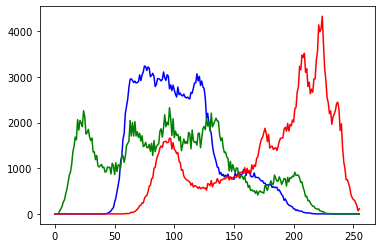

In [27]:
src = cv2.imread('./computer_vision/fig/fig/lenna.bmp', 1)

# calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
hist_b = cv2.calcHist([src], [0], None, [256], [0,256])
hist_g = cv2.calcHist([src], [1], None, [256], [0,256])
hist_r = cv2.calcHist([src], [2], None, [256], [0,256])

cv2.imshow('src', src)

plt.plot(hist_b, c='b')
plt.plot(hist_g, c='g')
plt.plot(hist_r, c='r')
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
## -----------review-------------

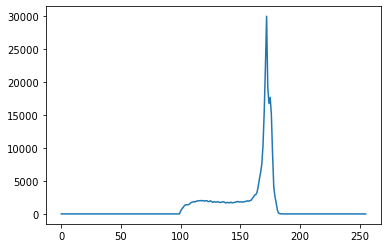

In [4]:
src = cv2.imread('./computer_vision/fig/green/puppy_shrink.png',0)

dst_norm = np.clip(255*(src- smin)/(smax - smin)+0, 0, 255)

cv2.imshow('src', src)

src_hist = cv2.calcHist([src],[0], None, [256], [0,256])

plt.plot(src_hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

100.0 184.0


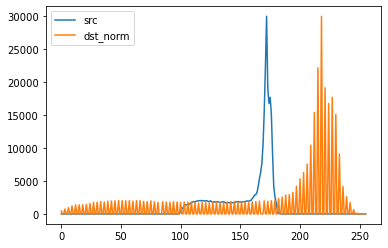

In [21]:
src = cv2.imread('./computer_vision/fig/green/puppy_shrink.png',0)
smin, smax, _, _, = cv2.minMaxLoc(src)
print(smin, smax)


# normalize(src, dst[, alpha[, beta[, norm_type[, dtype[, mask]]]]]) -> dst
# src : 입력영상
# dst : 결과영상
# alpha : 정규화 최솟값 (ex 0)
# beta : 정규화 최댓값 (ex 155)
# norm_type : cv2.NORM_MINMAX
# dtype = -1, src와 같은 type

dst_norm_cv = cv2.normalize(src, None, 0,255, cv2.NORM_MINMAX, -1)
dst_norm = np.clip(255*(src- smin)/(smax - smin)+0, 0, 255).astype(np.uint8)
dst_equal = cv2.equalizeHist(src)


cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_norm_cv', dst_norm_cv)
cv2.imshow('dst_equal', dst_equal)

src_hist = cv2.calcHist([src],[0], None, [256], [0,256])
src_hist1 = cv2.calcHist([dst_norm],[0], None, [256], [0,256])


plt.plot(src_hist, label = 'src')
plt.plot(src_hist1, label = 'dst_norm')
plt.legend()
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

0.0 255.0


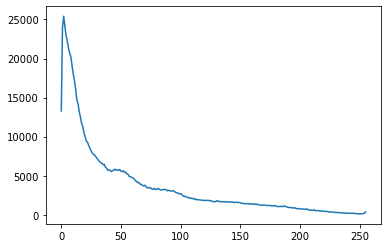

In [11]:
src = cv2.imread('./computer_vision/fig/green/manjang.jpg',0)
smin, smax, _, _, = cv2.minMaxLoc(src)
print(smin, smax)


# normalize(src, dst[, alpha[, beta[, norm_type[, dtype[, mask]]]]]) -> dst
# src : 입력영상
# dst : 결과영상
# alpha : 정규화 최솟값 (ex 0)
# beta : 정규화 최댓값 (ex 155)
# norm_type : cv2.NORM_MINMAX
# dtype = -1, src와 같은 type

dst_norm_cv = cv2.normalize(src, None, 0,255, cv2.NORM_MINMAX, -1)
dst_norm = np.clip(255*(src- smin)/(smax - smin)+0, 0, 255).astype(np.uint8)
dst_equal = cv2.equalizeHist(src)


cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_norm_cv', dst_norm_cv)
cv2.imshow('dst_equal', dst_equal)

src_hist = cv2.calcHist([src],[0], None, [256], [0,256])

plt.plot(src_hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

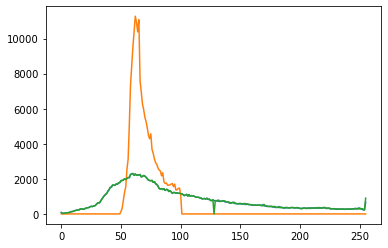

In [23]:
src = cv2.imread('./computer_vision/fig/fig/flowers.jpg',0)


dst_shr = cv2.normalize(src, None, 50,100, cv2.NORM_MINMAX, -1)
dst_norm = cv2.normalize(src, None, 0,256, cv2.NORM_MINMAX, -1)
dst_equal = cv2.equalizeHist(src)

cv2.imshow('src', src)
cv2.imshow('dst_shr', dst_shr)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_equal', dst_equal)

src_hist = cv2.calcHist([src],[0], None, [256], [0,256])
dst_shr_hist = cv2.calcHist([dst_shr],[0], None, [256], [0,256])
dst_norm_hist = cv2.calcHist([dst_norm],[0], None, [256], [0,256])

plt.plot(src_hist)
plt.plot(dst_shr_hist)
plt.plot(dst_norm_hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

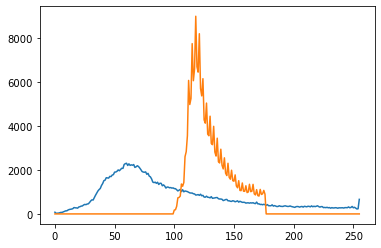

In [24]:
src = cv2.imread('./computer_vision/fig/fig/flowers.jpg',0)


dst_norm = np.clip(src*0.3 + 100., 0, 255).astype(np.uint8)

cv2.imshow('src', src)
# cv2.imshow('dst_shr', dst_shr)
cv2.imshow('dst_norm', dst_norm)
# cv2.imshow('dst_equal', dst_equal)

src_hist = cv2.calcHist([src],[0], None, [256], [0,256])
# dst_shr_hist = cv2.calcHist([dst_shr],[0], None, [256], [0,256])
dst_norm_hist = cv2.calcHist([dst_norm],[0], None, [256], [0,256])

plt.plot(src_hist)
# plt.plot(dst_shr_hist)
plt.plot(dst_norm_hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

2.0 255.0


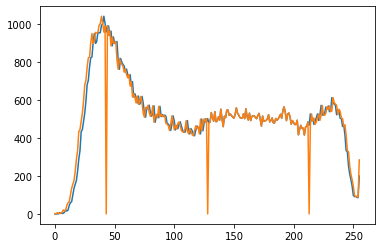

In [21]:
img = cv2.imread('./computer_vision/fig/green/spring_in_park.jpg', cv2.IMREAD_REDUCED_COLOR_4)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


h,s,v = cv2.split(img_hsv)


smin, smax, _, _, = cv2.minMaxLoc(v)
print(smin, smax)

# v_shr = np.clip(0.3*v +100.,0, 256).astype(np.uint8)
v_shr = cv2.normalize(v, None, 0,256, cv2.NORM_MINMAX, -1)
v_equal = cv2.equalizeHist(v)

src_new = cv2.merge((h,s,v_shr))
src_new1 = cv2.merge((h,s,v_equal))

img_new = cv2.cvtColor(src_new, cv2.COLOR_HSV2BGR)
img_new1 = cv2.cvtColor(src_new1, cv2.COLOR_HSV2BGR)


cv2.imshow('img', img)
# cv2.imshow('img_hsv', img_hsv)
# cv2.imshow('h', h)
# cv2.imshow('s', v)
# cv2.imshow('v', v)
# cv2.imshow('v_shr', v_shr)
cv2.imshow('img_new', img_new)
cv2.imshow('img_new1', img_new1)

v_hist = cv2.calcHist([v], [0], None, [256], [0,256])
v_shr_hist = cv2.calcHist([v_shr], [0], None, [256], [0,256])


plt.plot(v_hist)
plt.plot(v_shr_hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('./computer_vision/fig/green/spring_in_park.jpg', cv2.IMREAD_REDUCED_COLOR_4)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


h,s,v = cv2.split(img_hsv)

v_shr = cv2.normalize(v, None, 100,256, cv2.NORM_MINMAX, -1)

src_new = cv2.merge((h,s,v_shr))
img_new = cv2.cvtColor(src_new, cv2.COLOR_HSV2BGR)

cv2.imshow('img', img)
cv2.imshow('img_hsv', img_hsv)
cv2.imshow('src_new', src_new)
cv2.imshow('img_new', img_new)

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
## 영상 좌우반전
cap = cv2.VideoCapture(0)


cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)

while True:
    
    ret, frame = cap.read()
#     frame_flip = cv2.flip(frame, 1)
#     edge = cv2.Canny(frame , 50, 150)
    
    cv2.imshow('image', frame)
#     cv2.imshow('image_flip', frame_flip)
    
    key = cv2.waitKey(30)
    if key == 27 or key == ord('q'):    
        break
    
    elif key == ord('i'):
        while True:
            ret, frame = cap.read()
            edge = cv2.Canny(frame,50,150)
            cv2.imshow('image',edge)
            
            if cv2.waitKey(30) == 27:
                break
            
    elif key == ord('f'):
        while True:
            ret, frame = cap.read()
            frame = cv2.flip(frame,1)
            cv2.imshow('image', frame)
            
            if cv2.waitKey(30) == 27:
                break
            
            #     elif if key == ord('f'):
        
        
cap.release()
cv2.destroyAllWindows()

In [6]:
cap = cv2.VideoCapture(0)

f_flag = False
i_flag = False

while True:
    ret, frame = cap.read()
    if ret is None:
        print('Video read failed')
        break

    if f_flag:
        frame = cv2.flip(frame, 1)
    if i_flag:
        frame = cv2.Canny(frame, 50, 150)

    cv2.imshow('image', frame)

    kw = cv2.waitKey(20)
    if kw==27:
        break
    elif kw==ord('f'):
        f_flag = not f_flag
    elif kw==ord('i'):
        i_flag = not i_flag


cap.release()
cv2.destroyAllWindows()

In [6]:
## 색깔 뽑아내기
src = cv2.imread('./computer_vision/fig/green/palette.png')
src_dark = cv2.imread('./computer_vision/fig/green/palette_dark.png')

# inRange(src, lowerb, upperb[, dst]) -> dst
#src : 입력영상
# lowerb : 하한값(0,0,0)
# upperb : 상한값(255,255,255)


dst_bgr = cv2.inRange(src, (0, 150, 0), (100,255,100))
dst_bgr_dark = cv2.inRange(src_dark, (0, 150, 0), (50,255,50))

cv2.imshow('src', src)
cv2.imshow('src_dark', src_dark)
cv2.imshow('dst_bgr', dst_bgr)
cv2.imshow('dst_bgr_dark', dst_bgr_dark)




cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
src = cv2.imread('./computer_vision/fig/green/palette.png')
src_dark = cv2.imread('./computer_vision/fig/green/palette_dark.png')

# inRange(src, lowerb, upperb[, dst]) -> dst
#src : 입력영상
# lowerb : 하한값(0,0,0)
# upperb : 상한값(255,255,255)


dst_bgr = cv2.inRange(src, (0, 0, 150), (150,150,255))
# dst_bgr_dark = cv2.inRange(src_dark, (0, 150, 0), (50,255,50))

cv2.imshow('src', src)
# cv2.imshow('src_dark', src_dark)
cv2.imshow('dst_bgr', dst_bgr)
# cv2.imshow('dst_bgr_dark', dst_bgr_dark)




cv2.waitKey()
cv2.destroyAllWindows()

In [24]:
## 파란색
src = cv2.imread('./computer_vision/fig/green/palette.png')
dst_bgr = cv2.inRange(src, (128,0,0), (255,50,50))

cv2.imshow('src', src)
cv2.imshow('dst_bgr', dst_bgr)

cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
## hsv로 색 뽑기
src = cv2.imread('./computer_vision/fig/green/palette.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

#h, s, v
dst_hsv = cv2.inRange(src_hsv, (110,220, 140),(130 ,255, 255))

cv2.imshow('src', src)
cv2.imshow('dst_hsv', dst_hsv)

cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
def call_trackbar(pos):
    hmin = cv2.getTrackbarPos('H_min', 'src')
    hmax = cv2.getTrackbarPos('H_max', 'src')
    
    dst = cv2.inRange(src_hsv, (hmin, 150, 150), (hmax, 255, 255))
    cv2.imshow('src', dst)
    

src = cv2.imread('./computer_vision/fig/green/palette.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

#h, s, v
cv2.namedWindow('src')
cv2.createTrackbar('H_min', 'src', 50,179, call_trackbar)
cv2.createTrackbar('H_max', 'src', 80,179, call_trackbar)


cv2.imshow('src', src)
cv2.imshow('src1', src)
# cv2.imshow('dst_hsv', dst_hsv)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [25]:
def call_trackbar(pos):
    hmin = cv2.getTrackbarPos('H_min', 'src')
    hmax = cv2.getTrackbarPos('H_max', 'src')
    
    mask = cv2.inRange(src_hsv, (hmin, 100, 100), (hmax, 255, 255))
    cv2.imshow('src', mask)
src = cv2.imread('./computer_vision/fig/green/chromakey.png', cv2.IMREAD_REDUCED_COLOR_2)
dst = cv2.imread('./computer_vision/fig/green/autumn.jpg',cv2.IMREAD_REDUCED_COLOR_4)
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h,w = src.shape[:2]
src_new = cv2.inRange(src_hsv, (40, 100, 100), (70, 255, 255))

dst = cv2.resize(dst, (w,h), cv2.INTER_AREA)
_, mask = cv2.threshold(src_new,244,255,cv2.THRESH_BINARY_INV)


# print(dst.shape)
# crop = dst[0:0+h, 0:0+w]

cv2.copyTo(src, mask, dst)

cv2.namedWindow('src')
cv2.createTrackbar('H_min', 'src', 40,179, call_trackbar)
cv2.createTrackbar('H_max', 'src', 70,179, call_trackbar)


cv2.imshow('src', src)
cv2.imshow('mask', mask)
# cv2.imshow('crop', crop)
cv2.imshow('dst',dst)


cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [6]:
def call_trackbar(pos):
    hmin = cv2.getTrackbarPos('H_min', 'src')
    hmax = cv2.getTrackbarPos('H_max', 'src')
    smin = cv2.getTrackbarPos('s_min', 'src')
    
    mask = cv2.inRange(src_hsv, (hmin, smin, 0), (hmax, 255, 255))
    src1 = src.copy()
    cv2.copyTo(dst, mask, src1)
    cv2.imshow('mask', mask)
    cv2.imshow('src', src1)

src = cv2.imread('./computer_vision/fig/green/chromakey.png')
dst = cv2.imread('./computer_vision/fig/green/autumn.jpg')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h,w = src.shape[:2]
dst = cv2.resize(dst, (w, h), cv2.INTER_AREA)


cv2.namedWindow('src')
cv2.createTrackbar('H_min', 'src', 40,179, call_trackbar)
cv2.createTrackbar('H_max', 'src', 70,179, call_trackbar)
cv2.createTrackbar('s_min', 'src', 0,255, call_trackbar)


cv2.imshow('src', src)
# cv2.imshow('crop', crop)
cv2.imshow('dst',dst)


cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'
